## Installing required libraries.

* We use `tensorflow-datasets` that provides a lot of read-to-use datasets
* Good to add `docs`

In [1]:
!pip install -q tensorflow-datasets
!pip install -q git+https://github.com/tensorflow/docs

In [0]:
import tensorflow as tf
import tensorflow_datasets as tfds
import urllib
AUTOTUNE = tf.data.experimental.AUTOTUNE
import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_datasets as tfds
import PIL.Image
import matplotlib.pyplot as plt
import numpy as np

In [0]:
# Necessary for dealing with https urls
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

We use `textures in colorectal cancer histology dataset` (ref: Tensorflow Dataset: https://www.tensorflow.org/datasets/catalog/colorectal_histology. Each image is of size 150 x 150 x 3 RGB from 8 different classes and there are 5000 images.

Some frequently used arguments:

* split=: Pick the predefined split to read (see [TensorFlow API guide](https://www.tensorflow.org/datasets/splits)).
* shuffle_files=: Shuffle the files in each epoch if `True`. This creates different batches for each epoch of training.
* data_dir=: Location of saving data ( default: ~/tensorflow_datasets/)
* with_info=: Returns the tfds.core.DatasetInfo containing dataset metadata
* download=: If `True`, it downloads the dataset. Once we downloaded that, for future calls, we set this to `False` as a redownload is not necessary.

Read more [here](https://www.tensorflow.org/datasets/api_docs/python/tfds/load) about `tfds.load`.

In [0]:
# We read only the first 10 training samples
ds, ds_info = tfds.load('colorectal_histology', split='train', shuffle_files=True, with_info=True, download=False)
assert isinstance(ds, tf.data.Dataset)
print(ds_info)

tfds.core.DatasetInfo(
    name='colorectal_histology',
    version=2.0.0,
    description='Classification of textures in colorectal cancer histology. Each example is a 150 x 150 x 3 RGB image of one of 8 classes.',
    homepage='https://zenodo.org/record/53169#.XGZemKwzbmG',
    features=FeaturesDict({
        'filename': Text(shape=(), dtype=tf.string),
        'image': Image(shape=(150, 150, 3), dtype=tf.uint8),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=8),
    }),
    total_num_examples=5000,
    splits={
        'train': 5000,
    },
    supervised_keys=('image', 'label'),
    citation="""@article{kather2016multi,
      title={Multi-class texture analysis in colorectal cancer histology},
      author={Kather, Jakob Nikolas and Weis, Cleo-Aron and Bianconi, Francesco and Melchers, Susanne M and Schad, Lothar R and Gaiser, Timo and Marx, Alexander and Z{"o}llner, Frank Gerrit},
      journal={Scientific reports},
      volume={6},
      pages={27988},
      y

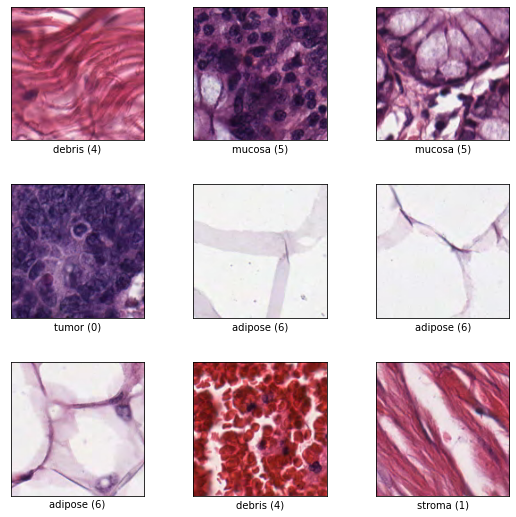

In [0]:
# Visualizing images
fig = tfds.show_examples(ds_info, ds)

In [0]:
# Reading all images (remove break point to read all)
for example in tfds.as_numpy(ds):
  image, label = example['image'], example['label']
  break

# take one sample from data
one_sample = ds.take(1)
one_sample = list(one_sample.as_numpy_iterator())
image = one_sample[0]['image']
label = one_sample[0]['label']
print(image.shape,label.shape)

(150, 150, 3) ()


In [0]:
# Side by side visualization
def visualize(im, imAgmented, operation):
  fig = plt.figure()
  plt.subplot(1,2,1)
  plt.title('Original image')
  plt.imshow(im)

  plt.subplot(1,2,2)
  plt.title(operation)
  plt.imshow(imAgmented)

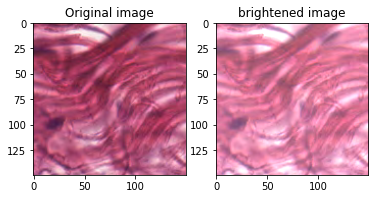

In [0]:
# Adjusting brighness
bright = tf.image.adjust_brightness(image, 0.2)
visualize(image, bright, 'brightened image')

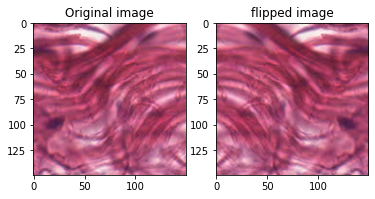

In [0]:
# Flip image
flipped = tf.image.flip_left_right(image)
visualize(image, flipped, 'flipped image')

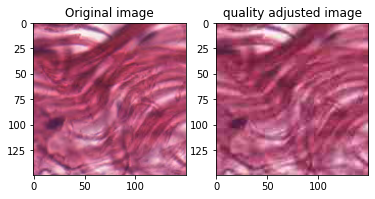

In [0]:
adjusted = tf.image.adjust_jpeg_quality(image, jpeg_quality=20)
visualize(image, adjusted, 'quality adjusted image')

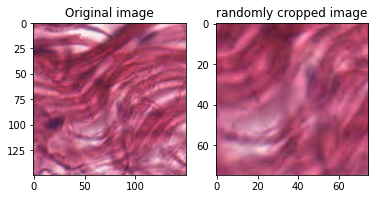

In [0]:
# Randon cropping of the image (the cropping area is picked at random)
crop_to_original_ratio = 0.5 # The scale of the cropped area to the original image
new_size = int(crop_to_original_ratio * image.shape[0])
cropped = tf.image.random_crop(image, size=[new_size,new_size,3])
visualize(image, cropped, 'randomly cropped image')

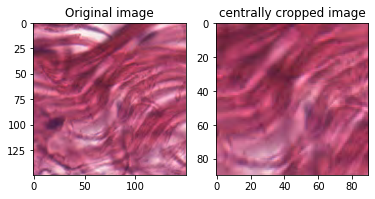

In [0]:
# Center cropping of the image (the cropping area is at the center)
central_fraction = 0.6 # The scale of the cropped area to the original image
center_cropped = tf.image.central_crop(image, central_fraction=central_fraction)
visualize(image, center_cropped, 'centrally cropped image')

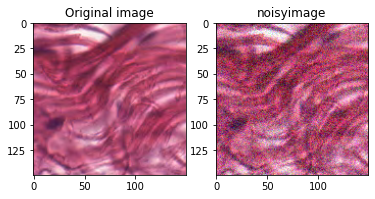

In [0]:
# Adding Gaussian noise to image
common_type = tf.float32 # Make noise and image of the same type
gnoise = tf.random.normal(shape=tf.shape(image), mean=0.0, stddev=0.1, dtype=common_type)
image_type_converted = tf.image.convert_image_dtype(image, dtype=common_type, saturate=False)
noisy_image = tf.add(image_type_converted, gnoise)
visualize(image_type_converted, noisy_image, 'noisyimage')